<a href="https://colab.research.google.com/github/TyapkinaPA/-/blob/main/05_hw_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [22]:
df = pd.read_csv('/content/train[1].csv')

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

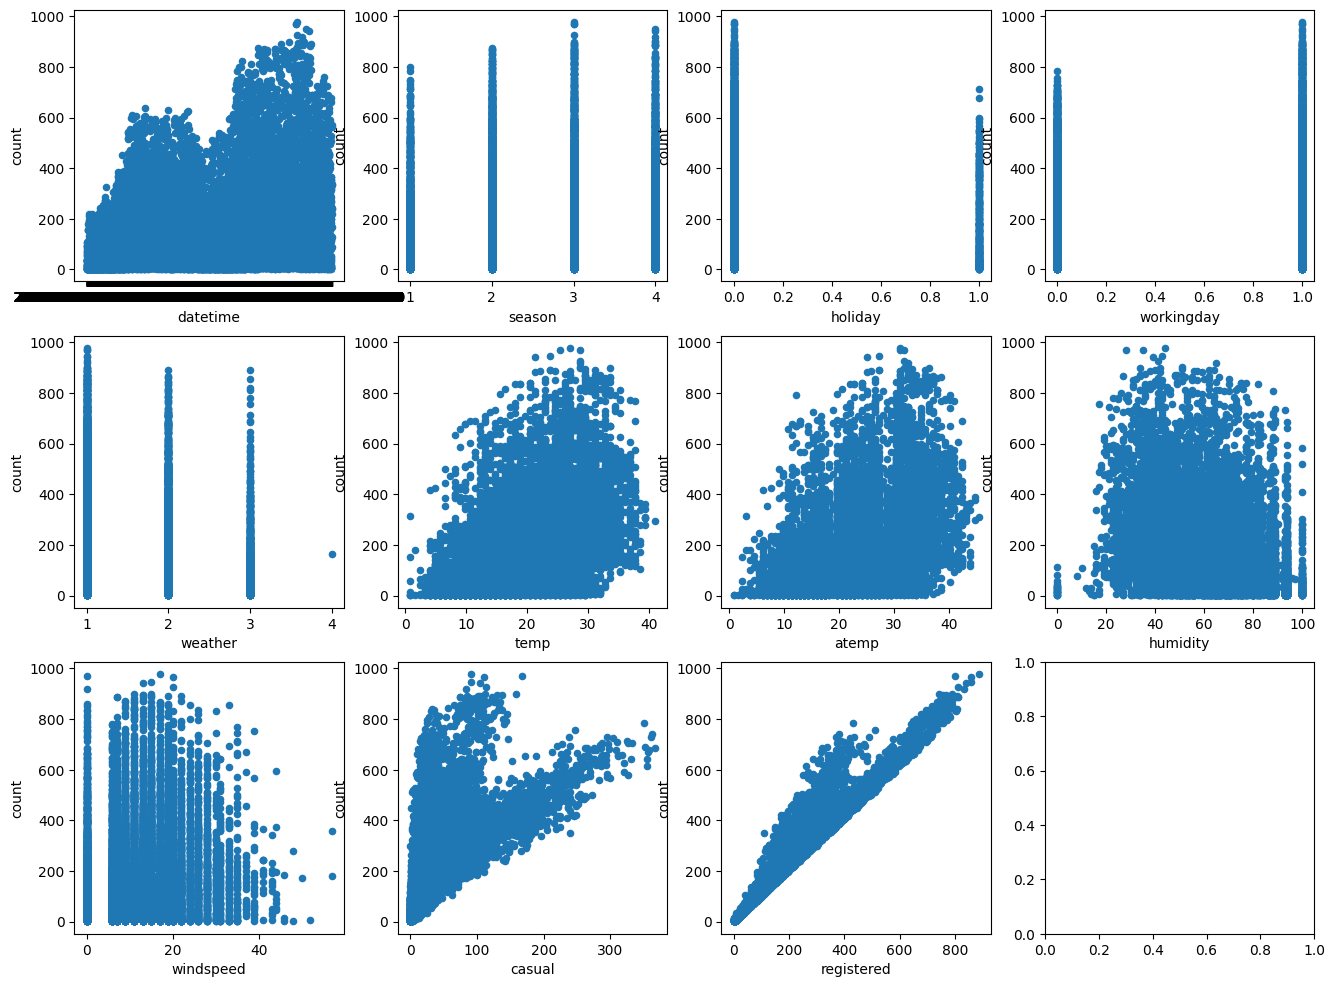

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

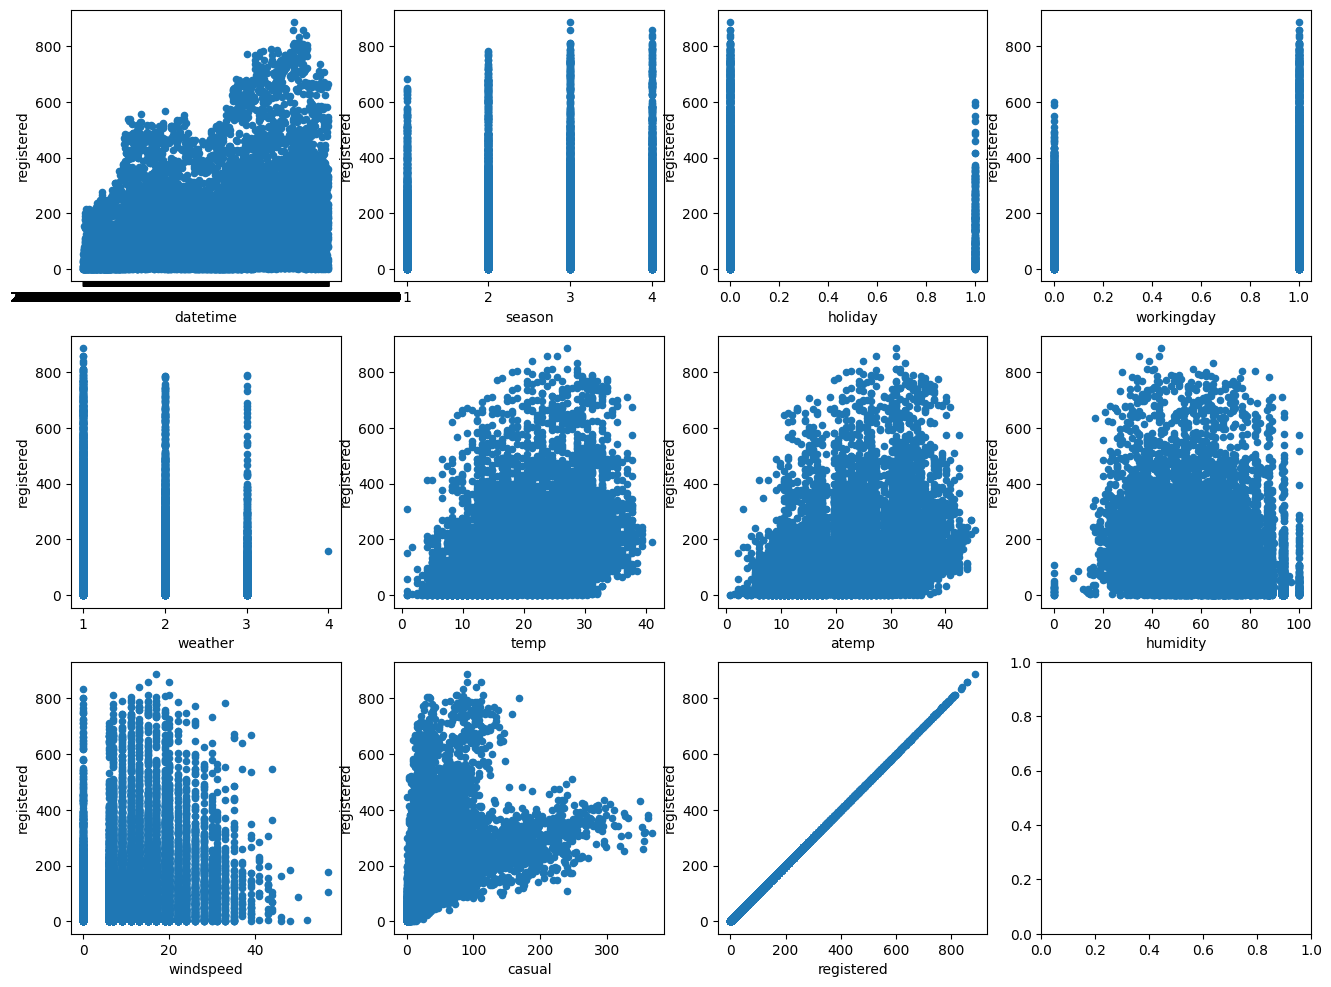

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "registered", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ:
*погода, праздники, время суток и т.д. В общем случае, число прокатов меняется в зависимости от сезона и может быть выше в летние месяцы и ниже в зимние.*

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:
*“workingday” (рабочий день) и “weather” (погода). Если “workingday” равен 1, то это рабочий день и число прокатов велосипедов скорее всего больше, чем в выходной день (workingday = 0). Если “weather” равен 1 или 2 (хорошая или нормальная погода), то число прокатов также скорее всего будет больше, чем при плохой погоде (weather = 3 или 4).*

In [45]:
sns.lmplot(data=df, x='workingday', y='weather')
plt.show()

KeyError: ignored

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

– weathersit (оценка благоприятности погоды)

– holiday (наличие праздника)

– weekday (день недели)

– temp (температура).

Ответ

<Axes: >

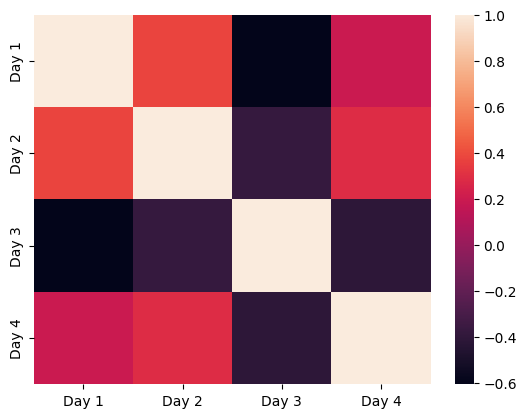

In [34]:
sns.heatmap(df.corr())

<Axes: >

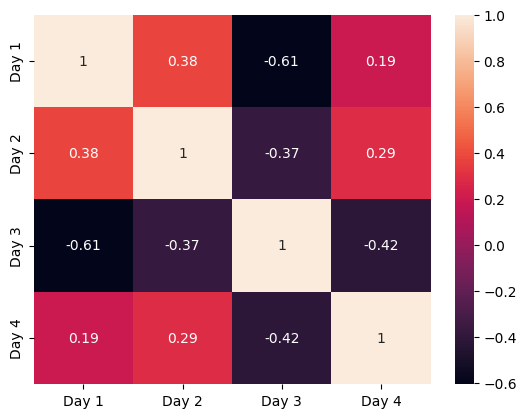

In [36]:
sns.heatmap(df.corr(), annot = True)

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: В предыдущем графике не было большой корреляции между количеством прокатов и годом, так как график показывает суммарное количество прокатов по месяцам и годам. Год является одним из параметров группировки, поэтому на графике не видно прямой корреляции между годом и количеством прокатов.

<Axes: >

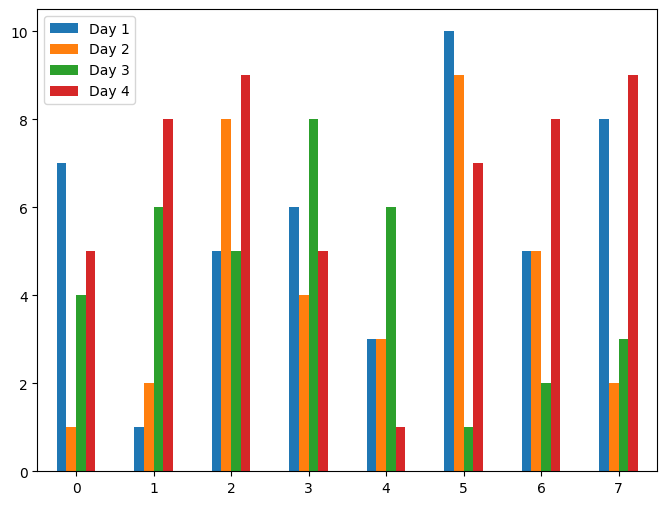

In [52]:
df.plot.bar(rot=0, figsize=(8, 6))

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

Он содержит информацию о прокате велосипедов в разных городах. Это анонимные данные, которые были собраны и обработаны компанией по аренде велосипедов.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ:
    
Ответ:

In [ ]:
df.weekday.value_counts().plot.bar()
plt.show()

df.weathersit.value_counts().plot.bar()
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ:

Ответ:

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ:

ValueError: ignored

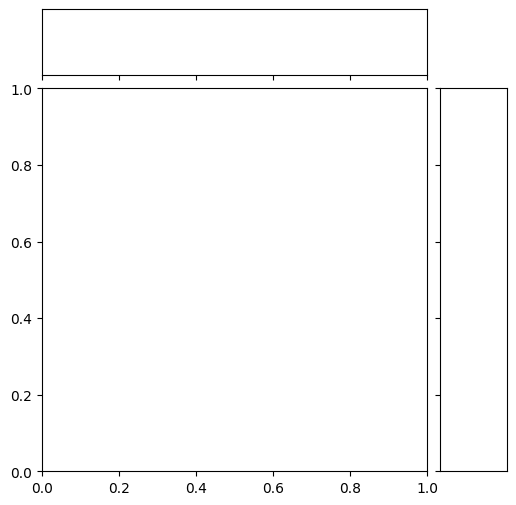

In [72]:
sns.jointplot(data=df, x='temp', y='atemp', kind='reg')
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Это может быть связано с различными факторами, такими как погода, праздники, сезонность и т.д. Например, в летние месяцы люди могут чаще брать велосипеды в выходные дни для прогулок на свежем воздухе, в то время как в зимние месяцы они могут предпочесть использовать их в рабочие дни для поездок на работу и обратно. Кроме того, на частоту проката велосипедов могут влиять праздники и выходные дни, которые приходятся на разные месяцы.

Ответ:

In [66]:
# Создаем DataFrame с данными о прокатах велосипедов
data = {'Месяц': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'Количество прокатов': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 0]}

In [67]:
# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

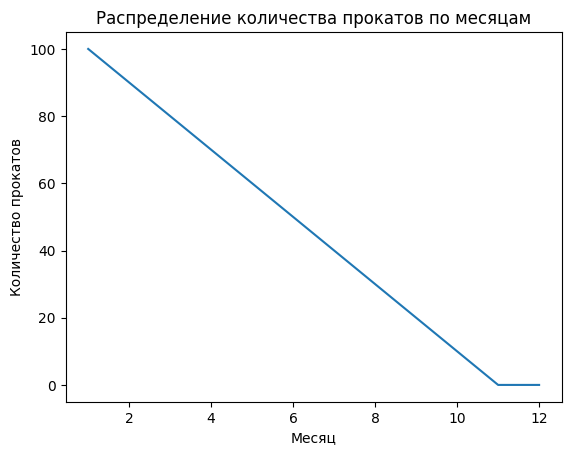

In [69]:
# Рисуем график
sns.lineplot(x='Месяц', y='Количество прокатов', data=df)
plt.ylabel('Количество прокатов')
plt.xlabel('Месяц')
plt.title('Распределение количества прокатов по месяцам')
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:
“ощущается ли холоднее, чем на самом деле” - и проанализировать его зависимость от ветра. Если при более сильном ветре чаще ощущается холод, то на графике мы увидим положительную корреляцию между этими двумя признаками.